In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.metrics import normalized_mutual_info_score
from pylineaGT.simulations import Simulate
from pylineaGT.run import run_inference, single_run
from pylineaGT.nbmm import *

%load_ext autoreload
%autoreload 2

/Users/elenab/Library/r-miniconda-arm64/envs/lineagt-env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: ylabel='Frequency'>

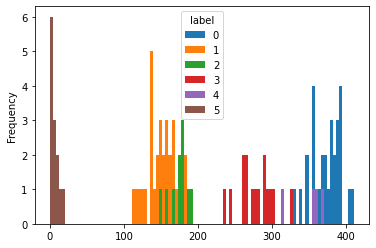

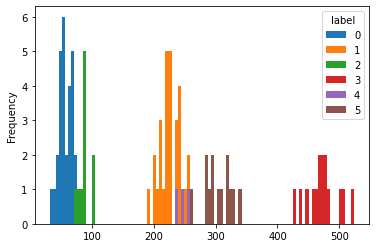

In [2]:
obj = Simulate(seed=1, N=100, T=2, K=6, likelihood="NB", c=4., mean_loc=500, max_iter=100)
obj.generate_dataset()

cols = {0:"red", 1:"blue", 2:"green", 3:"yellow", 4:"orange", 5:"purple"}
colors = [cols[i] for i in obj.params["z"].tolist()]
df = pd.DataFrame({"x1":obj.dataset[:,0].tolist(),
                   "x2":obj.dataset[:,1].tolist(),
                #    "x3":obj.dataset[:,2].tolist(),
                #    "x4":obj.dataset[:,3].tolist(),
                   "label":obj.params["z"].tolist()})
df.pivot(columns="label", values="x1").plot.hist(bins=100)
df.pivot(columns="label", values="x2").plot.hist(bins=100)
# df.pivot(columns="label", values="x3").plot.hist(bins=100)
# df.pivot(columns="label", values="x4").plot.hist(bins=100)

ELBO 22.001338: 100%|██████████| 117/117 [00:00<00:00, 522612.96it/s]


<Axes: ylabel='Frequency'>

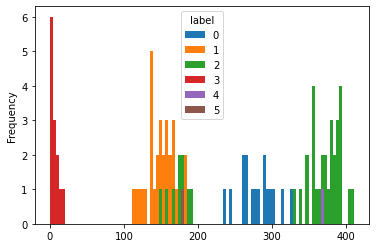

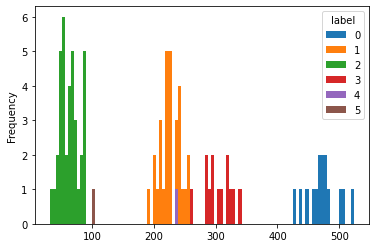

In [ ]:
fit = run_inference(cov_df=obj.dataset, k_interval=[3,9], return_object=True)

print(normalized_mutual_info_score(fit[4].tolist(), obj.params["z"]))

cols = {0:"red", 1:"blue", 2:"green", 3:"yellow", 4:"orange", 5:"purple", 6:"red"}
colors = [cols[i] for i in fit[4].tolist()]

df = pd.DataFrame({"x1":obj.dataset[:,0].tolist(),
                   "x2":obj.dataset[:,1].tolist(),
                #    "x3":obj.dataset[:,2].tolist(),
                #    "x4":obj.dataset[:,3].tolist(),
                   "label":fit[4].tolist()})

df.pivot(columns="label", values="x1").plot.hist(bins=100)
df.pivot(columns="label", values="x2").plot.hist(bins=100)
# df.pivot(columns="label", values="x3").plot.hist(bins=100)
# df.pivot(columns="label", values="x4").plot.hist(bins=100)

# Negative Binomial Mixture Model

In [ ]:
from pylineaGT.nbmm import *

X = obj.dataset
fit_NB = run_NB_inference(X, k_interval=[3,9], return_object=True, seed=123)

print(normalized_mutual_info_score(fit_NB[3], obj.params["z"]))

cols = {0:"red", 1:"blue", 2:"green", 3:"yellow", 4:"orange", 5:"purple", 6:"red"}
colors = [cols[i] for i in fit_NB[3].tolist()]

df = pd.DataFrame({"x1":obj.dataset[:,0].tolist(),
                   "x2":obj.dataset[:,1].tolist(),
                #    "x3":obj.dataset[:,2].tolist(),
                #    "x4":obj.dataset[:,3].tolist(),
                   "label":fit_NB[3].tolist()})

df.pivot(columns="label", values="x1").plot.hist(bins=100)
df.pivot(columns="label", values="x2").plot.hist(bins=100)
# df.pivot(columns="label", values="x3").plot.hist(bins=100)
# df.pivot(columns="label", values="x4").plot.hist(bins=100)

ELBO 1258.522827: 100%|██████████| 1000/1000 [00:02<00:00, 364.11it/s]


0.764549666647254